In [1]:
import tensorflow as tf

In [2]:
fashion_mnist= tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
(x_train2, y_train2), (x_test2, y_test2) = fashion_mnist.load_data()
x_train= x_train/255  ##This is the equivalent of normalising. We are dviding by the max value of pixel intensity
x_test= x_test/255


In [3]:
##Create an array with the different names of the clothes
class_names=["T-shirt","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ugly boot"]
class_names[y_train[0]]

'Ugly boot'

In [4]:
# input_shape = ((x_train.shape[1]*x_train.shape[2],)) 
# x_train = x_train.reshape(-1, input_shape[0]).astype('float32') # Reshape transform into vectors an then we transform each of the vector elements into a 32 byte float 
# x_test = x_test.reshape(-1, input_shape[0]).astype('float32')

In [5]:
# Create a CNN model
# model = tf.keras.Sequential([
#     tf.keras.layers.Input(shape=input_shape),  # Input layer
#     tf.keras.layers.Dense(layer_1_nodes, activation='relu'),  # Hidden layer with 500 units with relu or sigmoid functions
#     tf.keras.layers.Dense(layer_2_nodes, activation='relu'),  # Hidden layer with 500 units with relu or sigmoid functions
#     tf.keras.layers.Dense(layer_3_nodes, activation='relu'),  # Hidden layer with 500 units with relu or sigmoid functions
#     tf.keras.layers.Dense(output_nodes, activation='softmax')  # Output layer with softmax activation with softmax
# ])
#Alternative to 1st set of code
tf.random.set_seed(42) ##To replicate values
model=tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[x_train.shape[1],x_train.shape[2]]))
model.add(tf.keras.layers.Flatten())###Flatten does absolutely the same as reshape but automatically
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))##10 Because we have 10 classes


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
###Initial random not compiled yet
###Getting each layer
hidden_l1=model.layers[1]
hidden_l2=model.layers[2]
out_l1=model.layers[3]
model.layers


[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [8]:
###Initial random not compiled yet
##Getting node and biases weighys
weights_l1, biases_l1 = hidden_l1.get_weights()
weights_l1


array([[ 0.03486767, -0.04943771, -0.05012258, ..., -0.03047935,
        -0.02890559,  0.01677386],
       [-0.05893466,  0.06867863, -0.04182006, ..., -0.01856951,
        -0.01482454,  0.0309144 ],
       [ 0.06358576, -0.06431776, -0.01834342, ...,  0.00027566,
         0.04379306,  0.0311043 ],
       ...,
       [-0.02844637,  0.03405226,  0.00378733, ..., -0.04915958,
        -0.05172876,  0.05287547],
       [-0.05329042,  0.00711627,  0.07303376, ..., -0.05824684,
         0.07141334,  0.01650719],
       [-0.04224117,  0.07144582,  0.04596825, ..., -0.05366658,
         0.02964707,  0.00675441]], dtype=float32)

In [9]:
# Compile the model


model.compile(optimizer="sgd", 
              loss='sparse_categorical_crossentropy',    ###We use sparse because the output is not one hot encoders but still is a discrete one
              metrics=['accuracy'])     



In [10]:
##Compiling
Model = model.fit(
    x_train, y_train,          # Training data and labels
    epochs=30,                 # Number of epochs
#     batch_size=batch_size,             # Mini-batch size
    validation_split=0.1  # Fraction of training data to be used for validation
#     validation_data=(x_validation,y_validation)
)


Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6827 - loss: 0.9988 - val_accuracy: 0.8147 - val_loss: 0.5333
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8284 - loss: 0.5011 - val_accuracy: 0.8345 - val_loss: 0.4694
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8455 - loss: 0.4496 - val_accuracy: 0.8473 - val_loss: 0.4372
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8555 - loss: 0.4207 - val_accuracy: 0.8558 - val_loss: 0.4137
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8617 - loss: 0.3999 - val_accuracy: 0.8603 - val_loss: 0.3970
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8674 - loss: 0.3831 - val_accuracy: 0.8630 - val_loss: 0.3842
Epoch 7/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8714 - loss: 0.3690 - val_accuracy: 0.8672 - val_loss: 0.3773
Epoch 8/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8753 - loss: 0.3571 - 

In [11]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}') ###Loss value on th last dataset
print(f'Test Accuracy: {test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8832 - loss: 0.3420
Test Loss: 0.3380628526210785
Test Accuracy: 0.883400022983551


In [12]:
##Transforming Prediction into numbers

def output(x):
    def roundes(y):
        y=list(y)
        return y.index(max(y))
    outputs = []
    for i in x:
        xx = roundes(i)  # Get the index of 1 in the rounded list
        outputs.append(class_names[xx])  # Append the result to outputs
    return outputs

Outputs_test=output(model.predict(x_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


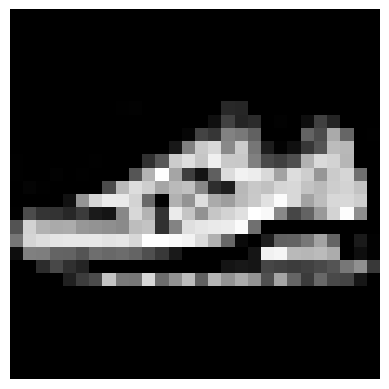

the MLP predict the clothing item as Sneaker


In [13]:
###Predicting 
import random
import matplotlib.pyplot as plt

imagetoshow= random.randint(1, len(Outputs_test))
image_test=x_test2[imagetoshow]
plt.imshow(image_test, cmap='gray')
plt.axis('off')  # Optional: turn off the axis
plt.show()
print(f"the MLP predict the clothing item as {Outputs_test[imagetoshow]}")


In [14]:
hidden_l1=model.layers[1]
hidden_l2=model.layers[2]
out_l1=model.layers[3]
##Getting  final node and biases weighys
weights_l1, biases_l1 = hidden_l1.get_weights()
weights_l1


array([[ 0.03482341, -0.04943771, -0.05012406, ..., -0.03047935,
        -0.02890254,  0.01684134],
       [-0.05859389,  0.06868282, -0.04180847, ..., -0.01857452,
        -0.01480421,  0.0309114 ],
       [ 0.06523735, -0.06476507, -0.01807637, ...,  0.00027642,
         0.0438569 ,  0.03078454],
       ...,
       [-0.02823202,  0.03427539,  0.01008546, ..., -0.04900652,
        -0.05369514,  0.05393742],
       [-0.04985757,  0.00661197,  0.07803334, ..., -0.05824855,
         0.07138868,  0.01700334],
       [-0.04166294,  0.07128636,  0.04647928, ..., -0.0535982 ,
         0.02925825,  0.0066873 ]], dtype=float32)

In [19]:
import pandas as pd 
###Inspecting the fitted model
History=pd.DataFrame(Model.history)#Plotting the model passthrough performance 
History

,accuracy,loss,val_accuracy,val_loss
0,0.763481,0.717967,0.814667,0.533267
1,0.833019,0.484482,0.834500,0.469425
2,0.847500,0.439668,0.847333,0.437167
3,0.856519,0.412660,0.855833,0.413714
4,0.862630,0.392848,0.860333,0.397019
5,0.868222,0.376917,0.863000,0.384247
6,0.872185,0.363739,0.867167,0.377271
7,0.876093,0.352461,0.872000,0.367815
8,0.879630,0.342363,0.872667,0.361425
9,0.882389,0.333201,0.873000,0.354985


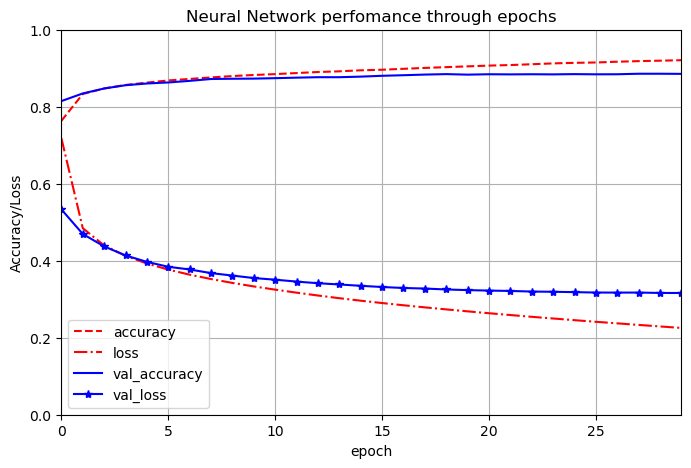

In [25]:
##Plotting the model epochs and the loss 
History.plot(grid=True, xlim=(0,29), ylim=(0,1), figsize=(8,5), xlabel="epoch", ylabel="Accuracy/Loss", style=["r--","r-.","b-","b*-"])
plt.title("Neural Network perfomance through epochs")
plt.show()